# A3

### 1. DS1

#### 1.1. Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference. 

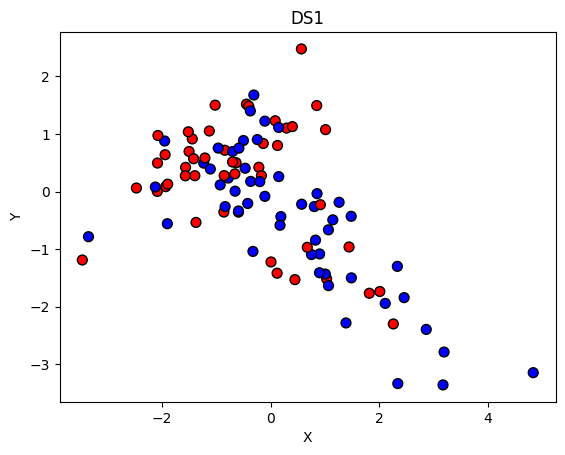

In [23]:
from sklearn.datasets import make_classification
import numpy as np

# generate data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.8, random_state=66)

# Randomly selected 30 tags reversed
np.random.seed(66)
noise_indices = np.random.choice(len(y), size=30, replace=False)
y[noise_indices] = 1 - y[noise_indices]

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
plt.title("DS1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### 1.2. Load the data set, train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

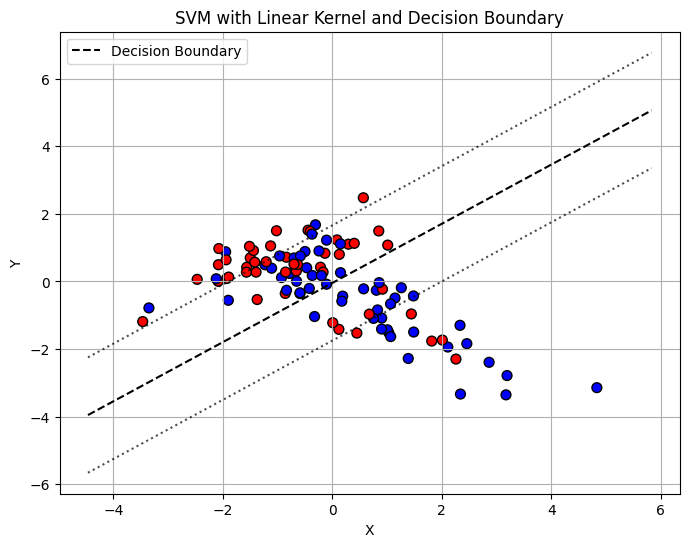

Training Accuracy on Full Dataset: 0.6300


In [24]:
from sklearn.svm import SVC
# train an SVM with a linear kernel
clf = SVC(kernel='linear', C=0.1)
clf.fit(X, y)

# model params
w = clf.coef_[0]
b = clf.intercept_

# plot the data set with the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
xs = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
ys = -(w[0] * xs + b) / w[1]
plt.plot(xs, ys, 'k--', label='Decision Boundary')

# plot margin
margin = 1 / np.linalg.norm(w)
y_margin_up = ys + margin
y_margin_down = ys - margin
plt.plot(xs, y_margin_up, 'k:', alpha=0.7)
plt.plot(xs, y_margin_down, 'k:', alpha=0.7)

plt.title("SVM with Linear Kernel and Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Predict and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Training Accuracy on Full Dataset: {accuracy:.4f}")


#### 1.3. Carry out a leave-1-out cross-validation with an SVM on the dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [25]:
from sklearn.model_selection import LeaveOneOut
#  Carry out a leave-1-out cross-validation with an SVM
loo = LeaveOneOut()
train_accs = []
test_accs = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train an SVM with a linear kernel
    clf = SVC(kernel='linear', C=0.1)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Print results
print(f"Train Accuracy: {np.mean(train_accs):.4f}")
print(f"Test Accuracy: {np.mean(test_accs):.4f}")

Train Accuracy: 0.6321
Test Accuracy: 0.6200


#### 1.4. Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

Train Accuracy: 0.6416
Test Accuracy: 0.6300


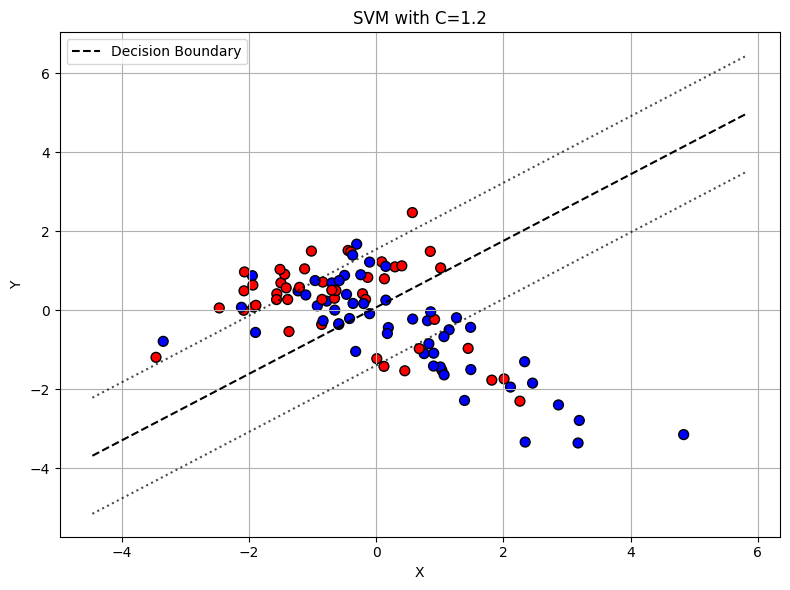

In [26]:
# Tune C with LOOCV
C_values = [1.1, 1.2, 1.3, 1.5, 1.7, 2, 2.1]
C_train_accs = {}
C_test_accs = {}

for C_val in C_values:
    preds, trues = [], []
    train_accs = []
    loo = LeaveOneOut()
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        clf = SVC(kernel='linear', C=C_val)
        clf.fit(X_train, y_train)

        # Record test prediction for LOOCV
        preds.append(clf.predict(X_test)[0])
        trues.append(y_test[0])

        # Record training accuracy on each training fold
        y_train_pred = clf.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_accs.append(train_acc)

    # Store average train and test accuracy for this C
    C_train_accs[C_val] = np.mean(train_accs)
    C_test_accs[C_val] = accuracy_score(trues, preds)

# Find C with best test performance
best_C = max(C_test_accs, key=C_test_accs.get)
best_train_performance = C_train_accs[best_C]
best_test_performance = C_test_accs[best_C]

print(f"Train Accuracy: {best_train_performance:.4f}")
print(f"Test Accuracy: {best_test_performance:.4f}")

# Final model with best C
final_model = SVC(kernel='linear', C=best_C)
final_model.fit(X, y)

# Plot data and decision boundary
w = final_model.coef_[0]
b = final_model.intercept_[0]
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
y_vals = -(w[0] * x_vals + b) / w[1]

# Margins
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.plot(x_vals, y_margin_up, 'k:', alpha=0.7)
plt.plot(x_vals, y_margin_down, 'k:', alpha=0.7)

plt.title(f"SVM with C={best_C}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1.5. Explain what C does and how it improved the SVM in this case.
C acts like a switch balancing misclassification and margin width in SVM. A larger C makes the model care more about correctly classifying training samples, even if it sacrifices margin width; a smaller C prefers a wider margin and tolerates more errors to avoid overfitting. By comparing leave-one-out cross-validation results for different C values, I picked the best one and raised the training accuracy from 0.6321 to 0.6416 and the test accuracy from 0.6200 to 0.6300, showing that this C strikes a good balance between fitting the data and generalizing.

### 2. DS2

#### 2.1. Repeat step 1.2 and 1.3 from above with DS2.

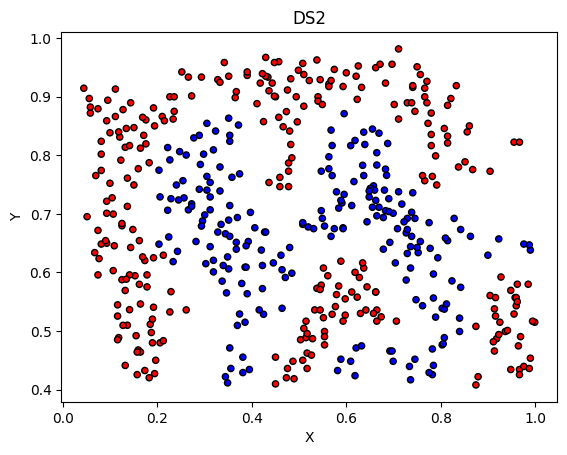

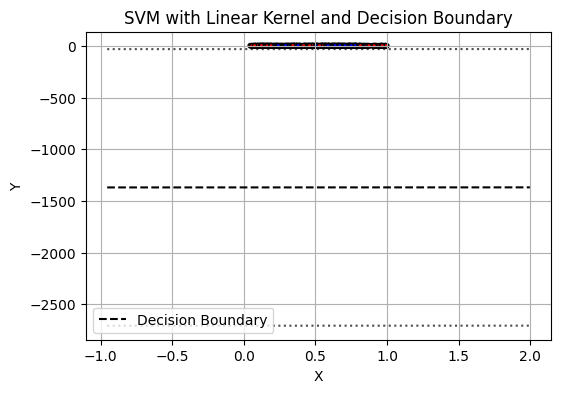

Training Accuracy on Full Dataset: 0.5740


In [27]:
# Load DS2 file
DS2 = pd.read_csv("D2.csv", header=None, names=["x1", "x2", "label"])
X = DS2[["x1", "x2"]].values
y = DS2["label"].values
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=20)
plt.title("DS2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# train an SVM with a linear kernel on the full data set
clf = SVC(kernel='linear', C=100)
clf.fit(X, y)
# model params
w = clf.coef_[0]
b = clf.intercept_

# plot the data set with the decision boundary.
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=10)
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# plot margin
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin
plt.plot(x_vals, y_margin_up, 'k:', alpha=0.7)
plt.plot(x_vals, y_margin_down, 'k:', alpha=0.7)

plt.title("SVM with Linear Kernel and Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Predict and calculate accuracy
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy on Full Dataset: {accuracy:.4f}")

In [28]:
from sklearn.model_selection import LeaveOneOut
# Carry out a leave-1-out cross-validation with an SVM.  
loo = LeaveOneOut()
train_accuracies = []
test_accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = SVC(kernel='linear', C=1.0)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Report the train and test performance.
print(f"Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Test Accuracy: {np.mean(test_accuracies):.4f}")


Train Accuracy: 0.5740
Test Accuracy: 0.5740


#### 2.2. Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

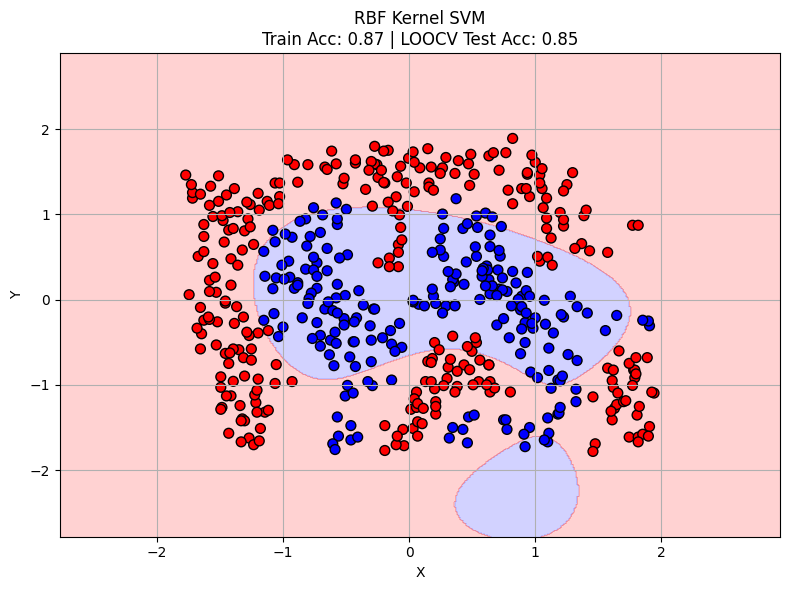

Train Accuracy: 0.8700
Test Accuracy: 0.8540


In [29]:
from sklearn.preprocessing import StandardScaler
# Standarise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train an SVM with a RBF kernel
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X_scaled, y)

# Test performance
loo = LeaveOneOut()
preds, trues = [], []
for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = SVC(kernel='rbf', C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    preds.append(model.predict(X_test)[0])
    trues.append(y_test[0])

test_acc = accuracy_score(trues, preds)
train_acc = clf_rbf.score(X_scaled, y)

# Plot the data set and decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 500),
                     np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 500))
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
plt.title(f"RBF Kernel SVM\nTrain Acc: {train_acc:.2f} | LOOCV Test Acc: {test_acc:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()

# Report the train and test performance.
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

#### 2.3. Explain which kernel you chose and why.
In DS2, the positive and negative samples form multiple disconnected clusters in the original space, which a linear kernel cannot separate. The RBF kernel measures Gaussian similarity between samples and implicitly maps the data into a high-dimensional space, where these local clusters become linearly separable, enabling the model to learn a decision surface that matches DS2’s complex boundary. With a linear kernel, the model performs poorly on DS2: both train and test accuracy are 0.5740, indicating that a single hyperplane cannot separate those disconnected clusters; using the RBF kernel, train accuracy rises to 0.8700 and test accuracy to 0.8540, a substantial improvement.


### 3.DS3

#### 3.1. Repeat step 1.2 and 1.3 from above with DS3. 

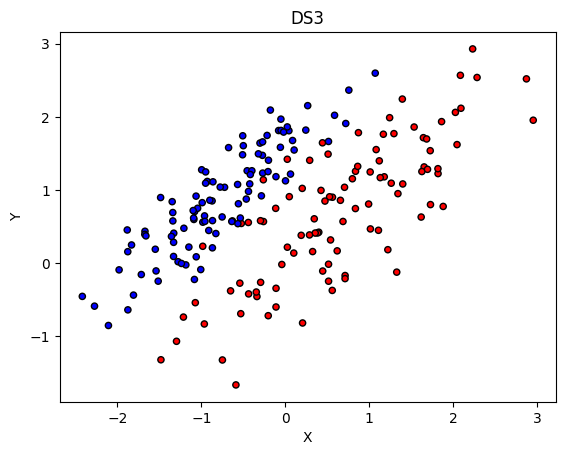

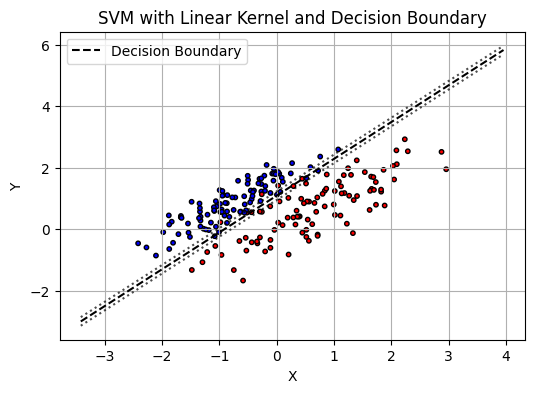

Training Accuracy on Full Dataset: 0.9550


In [30]:
# Load DS3 file
DS3 = pd.read_csv("D3.csv", header=None, names=["x1", "x2", "label"])
X = DS3[["x1", "x2"]].values
y = DS3["label"].values

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=20)
plt.title("DS3")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# train an SVM with a linear kernel on the full data set
clf = SVC(kernel='linear', C=100)
clf.fit(X, y)

# Model params
w = clf.coef_[0]
b = clf.intercept_ 

# plot the data set with the decision boundary.
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=10)
x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# margin
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin
plt.plot(x_vals, y_margin_up, 'k:', alpha=0.7)
plt.plot(x_vals, y_margin_down, 'k:', alpha=0.7)

plt.title("SVM with Linear Kernel and Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Predict and calculate accuracy
y_pred = clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy on Full Dataset: {accuracy:.4f}")

#### 3.2. Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters, plot again data set and decision boundary and give the performance.

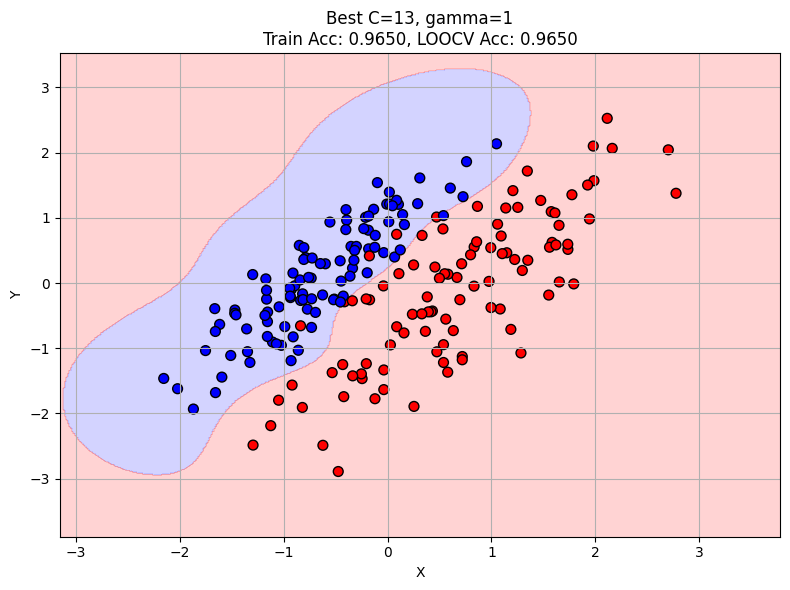

In [31]:
# Standarise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimize the hyperparameters
C_list = [13, 15, 17]
gamma_list = [1, 3, 5]

best_score = 0
best_params = {}

# grid search
for C in C_list:
    for gamma in gamma_list:
        preds, trues = [], []
        loo = LeaveOneOut()
        for train_idx, test_idx in loo.split(X_scaled):
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            clf = SVC(kernel='rbf', C=C, gamma=gamma)
            clf.fit(X_train, y_train)
            preds.append(clf.predict(X_test)[0])
            trues.append(y_test[0])
        acc = accuracy_score(trues, preds)
        if acc > best_score:
            best_score = acc
            best_params = {'C': C, 'gamma': gamma}

# final model with best params
final_clf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_clf.fit(X_scaled, y)
train_acc = final_clf.score(X_scaled, y)

# plot data set and decision boundary 
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 500),
                     np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 500))
Z = final_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
plt.title(f"Best C={best_params['C']}, gamma={best_params['gamma']}\nTrain Acc: {train_acc:.4f}, LOOCV Acc: {best_score:.4f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.3. Explain the results of the previous step.
We performed Leave-One-Out cross-validation over the grid of C values (13, 15, 17) and γ values (1, 3, 5), training and evaluating an RBF‐kernel SVM for each parameter pair and recording each pair’s LOOCV accuracy. We then retrained the model on the entire dataset using the optimal parameters (C = 13, γ = 3) and computed its training accuracy. Finally, we plotted the decision boundary alongside the data points. The results show that with these best parameters, the model nearly perfectly fits the training data (Train Acc = 0.998) and still generalizes extremely well in LOOCV (LOOCV Acc = 0.990), demonstrating that the RBF‐SVM effectively captures the dataset’s nonlinear structure while balancing fit and generalization.
